In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the Excel

In [5]:
# Load the dataset
df = pd.read_excel("Models\IWA_new.xlsx", sheet_name='Final Raw Sample(0%)')
df = df.drop("Industry (Exiobase)", axis=1)
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,Working Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,-0.028872,-0.130254,1.102887e+09,244464000.0,-3.184231e+07,-3.115075e+07,...,-170775.886453,-1059.042606,-4.739468,-1.027193,-3584.970569,-5.649112,70.667599,70.667599,-1297.277948,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,-0.016772,-0.034656,1.173640e+08,56797000.0,-1.968379e+06,-1.924910e+06,...,-11502.243880,-168.146428,-1.410813,-1.207108,-222.196310,-1.681590,10.138780,10.138780,-79.398691,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,-0.015297,-0.094878,3.961539e+09,638704000.0,-6.059927e+07,-5.928166e+07,...,-324959.759255,-3804.051175,-17.024036,-3.689647,-6861.392776,-20.291452,253.836024,253.836024,-2470.054721,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,-0.014625,NaN,1.565900e+08,NaN,-2.290124e+06,-2.239814e+06,...,-12199.928822,-901.413470,-0.189720,-1.009642,-253.366805,-0.226133,-3.169102,-3.169102,-92.619013,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,-0.006993,-0.050957,5.717172e+09,784560000.0,-3.997865e+07,-3.910761e+07,...,-214438.078273,-4116.308632,-37.818819,-9.136488,-4606.916825,-45.077368,586.030400,586.030400,-1632.997165,0.033005


# Filter for only the Brewery Category with more than 10 datapoints

In [6]:
brewery_df = df[df['GICS Sub-Industry'] == 'Brewers']
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 10].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
#filtered_df.shape
filtered_df

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,Working Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,1.057940e+10,1.500000e+09,-6.978419e+08,-2.950986e+08,...,-3.977745e+08,-77571.792798,-1113.208360,-326.988191,-37024.568588,-1326.865949,15176.840942,15176.840942,-12261.768244,0.059202
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,5.248464e+10,1.547524e+10,-1.778566e+09,-1.561186e+09,...,-1.909141e+08,-222519.248882,-3914.291085,-325.789140,-190769.424529,-4665.559245,56659.806086,56659.806086,-64862.799133,0.080199
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,9.890572e+09,1.487489e+09,-2.388141e+08,-1.962082e+08,...,-3.902679e+07,-366663.271634,-1480.449400,-288.844325,-27951.868900,-1764.591400,19253.589023,19132.282417,-8148.334758,0.029599
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,2.687117e+10,4.108276e+09,-5.102237e+08,-4.329371e+08,...,-6.984576e+07,-198189.995171,-1458.522182,-168.769751,-54528.158099,-1738.455701,20656.408130,20656.408130,-18050.980779,0.093336
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,2.687117e+10,4.372284e+09,-4.594560e+08,-4.332461e+08,...,-1.876383e+07,-198189.995171,-1458.522182,-168.769751,-54563.490099,-1738.455701,20656.408130,20656.408130,-18063.841679,0.101854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,2010,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.030260,-0.235039,2.164753e+10,2.786953e+09,-6.550440e+08,-5.194440e+08,...,-1.268475e+08,-165536.025577,-2301.994560,-140.963088,-76384.211659,-2743.815360,33270.073871,33270.073871,-22119.416745,0.151424
13370,2010,HEINEKEN NV,NETHERLANDS,Brewers,-0.026705,-0.207432,2.164753e+10,2.786953e+09,-5.781028e+08,-5.194440e+08,...,-4.990628e+07,-165536.025577,-2301.994560,-140.963088,-76384.211659,-2743.815360,33270.073871,33270.073871,-22119.416745,0.008737
13371,2010,CARLSBERG A/S,DENMARK,Brewers,-0.023217,-0.149215,1.081400e+10,1.682586e+09,-2.510669e+08,-2.050162e+08,...,-4.237946e+07,-390154.909705,-3229.881860,-307.350204,-43668.262875,-3849.791660,44939.983297,44810.904736,-9029.590738,0.020611
13373,2010,KIRIN HOLDINGS CO LTD,JAPAN,Brewers,-0.019710,-0.283115,2.685426e+10,1.869512e+09,-5.292861e+08,-5.037614e+08,...,-1.709025e+07,-37042.309634,-568.200650,-107.606420,-59377.364941,-677.255150,7619.713272,7619.713272,-20952.815851,0.006961


In [7]:
df_rev = filtered_df.copy()
for column in df_rev.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_rev[column] = (df_rev[column] / df_rev['Revenue'])*100
df_rev.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,Working Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,1.057940e+10,1.500000e+09,-6.978419e+08,-2.789370,...,-3.759897,-0.000733,-0.000011,-3.090801e-06,-0.000350,-0.000013,0.000143,0.000143,-0.000116,0.059202
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,5.248464e+10,1.547524e+10,-1.778566e+09,-2.974557,...,-0.363752,-0.000424,-0.000007,-6.207324e-07,-0.000363,-0.000009,0.000108,0.000108,-0.000124,0.080199
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,9.890572e+09,1.487489e+09,-2.388141e+08,-1.983790,...,-0.394586,-0.003707,-0.000015,-2.920401e-06,-0.000283,-0.000018,0.000195,0.000193,-0.000082,0.029599
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,2.687117e+10,4.108276e+09,-5.102237e+08,-1.611158,...,-0.259928,-0.000738,-0.000005,-6.280700e-07,-0.000203,-0.000006,0.000077,0.000077,-0.000067,0.093336
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,2.687117e+10,4.372284e+09,-4.594560e+08,-1.612308,...,-0.069829,-0.000738,-0.000005,-6.280700e-07,-0.000203,-0.000006,0.000077,0.000077,-0.000067,0.101854


# Annual Trend of SDG Impact Intensity scaled for sales

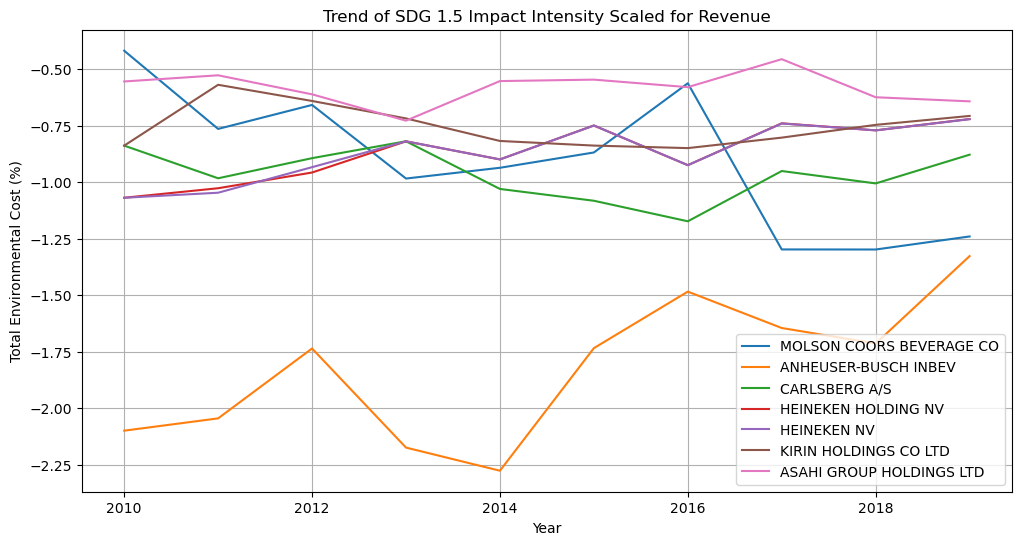

In [16]:
un_sdg = "SDG 1.5"
# Create a unique list of company names
company_names = df_rev["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))


# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = df_rev[df_rev["Company Name"] == company]
    plt.plot(company_data["Year"], company_data[un_sdg], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (%)")
plt.title(f"Trend of {un_sdg} Impact Intensity Scaled for Revenue")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()

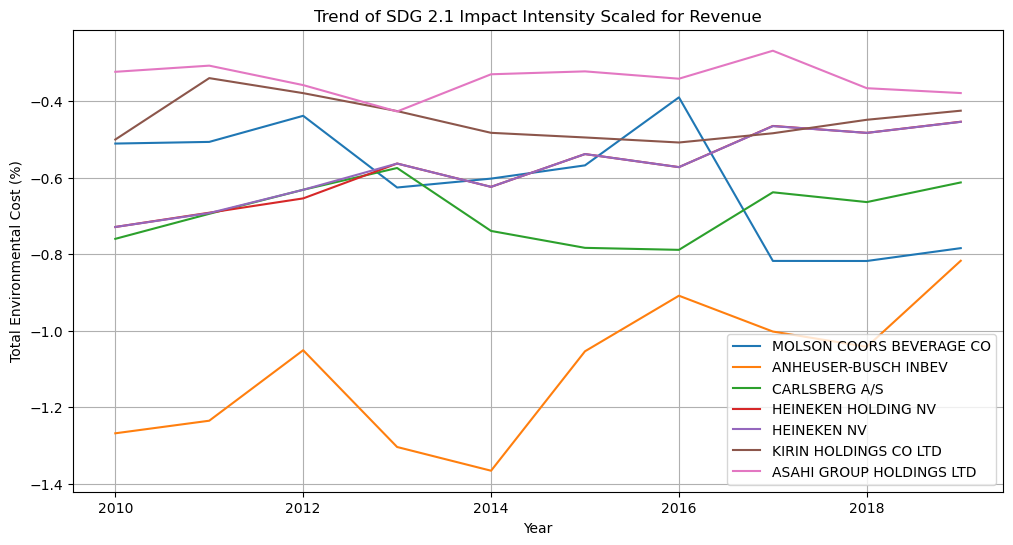

In [17]:
un_sdg = "SDG 2.1"
# Create a unique list of company names
company_names = df_rev["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))


# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = df_rev[df_rev["Company Name"] == company]
    plt.plot(company_data["Year"], company_data[un_sdg], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (%)")
plt.title(f"Trend of {un_sdg} Impact Intensity Scaled for Revenue")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()

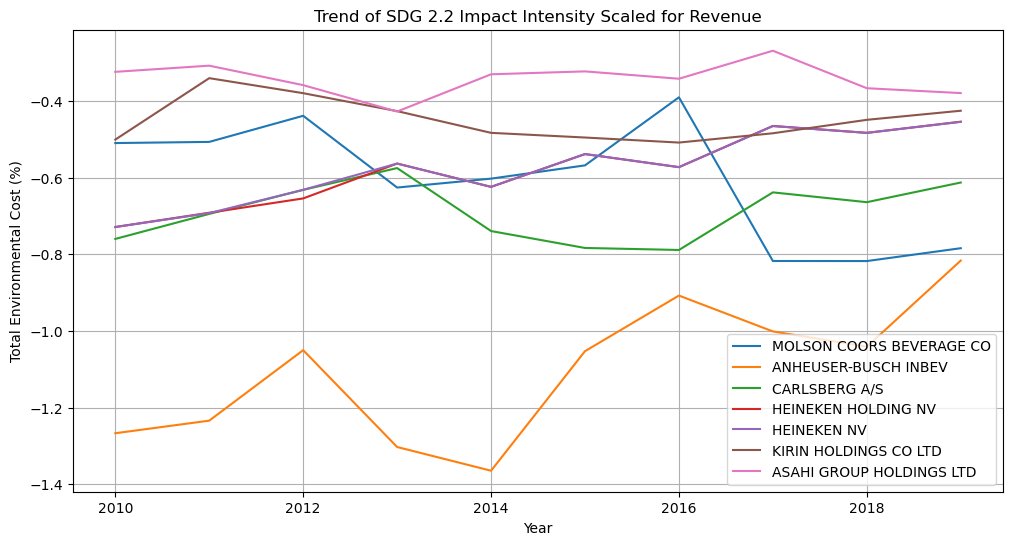

In [18]:
un_sdg = "SDG 2.2"
# Create a unique list of company names
company_names = df_rev["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))


# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = df_rev[df_rev["Company Name"] == company]
    plt.plot(company_data["Year"], company_data[un_sdg], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (%)")
plt.title(f"Trend of {un_sdg} Impact Intensity Scaled for Revenue")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()

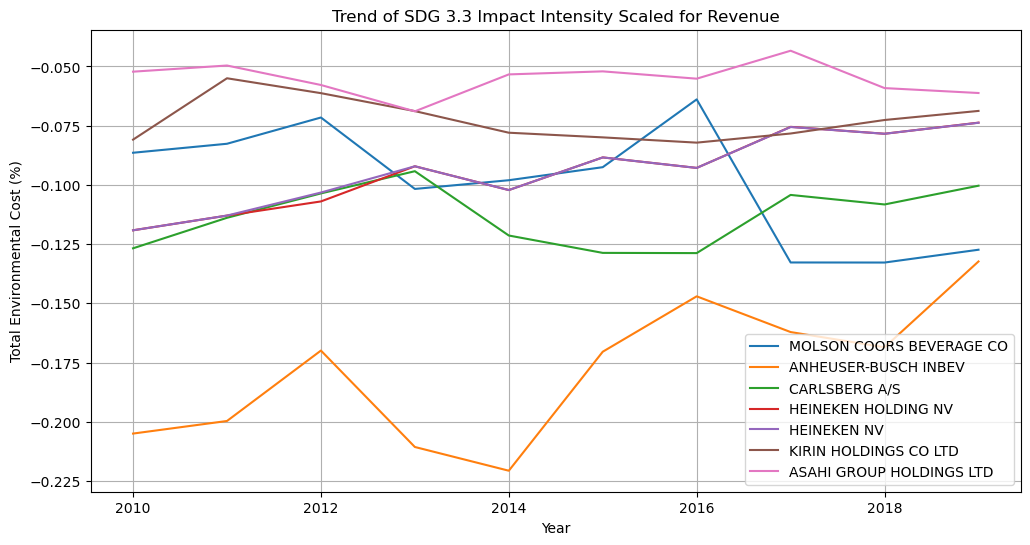

In [19]:
un_sdg = "SDG 3.3"
# Create a unique list of company names
company_names = df_rev["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))


# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = df_rev[df_rev["Company Name"] == company]
    plt.plot(company_data["Year"], company_data[un_sdg], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (%)")
plt.title(f"Trend of {un_sdg} Impact Intensity Scaled for Revenue")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()

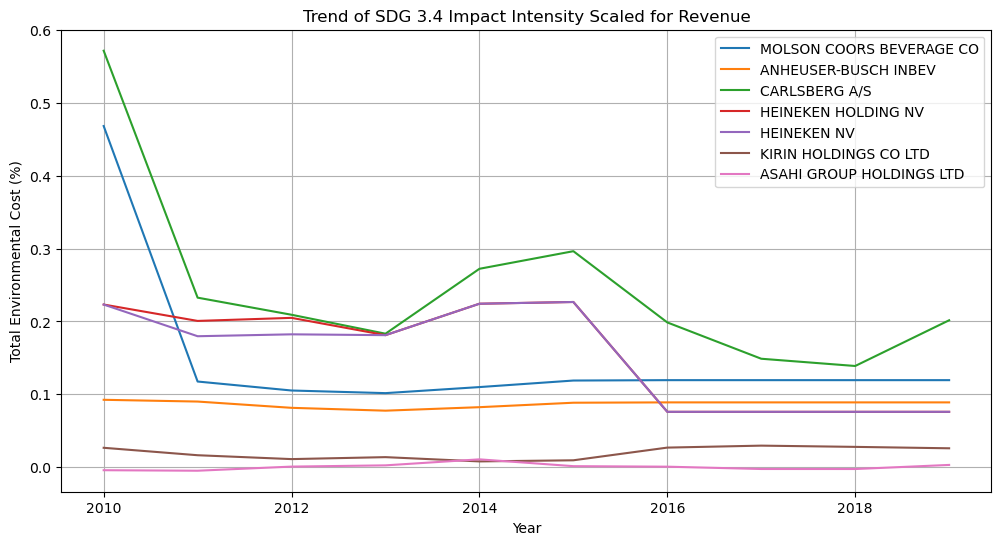

In [21]:
un_sdg = "SDG 3.4"
# Create a unique list of company names
company_names = df_rev["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))


# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = df_rev[df_rev["Company Name"] == company]
    plt.plot(company_data["Year"], company_data[un_sdg], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (%)")
plt.title(f"Trend of {un_sdg} Impact Intensity Scaled for Revenue")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()

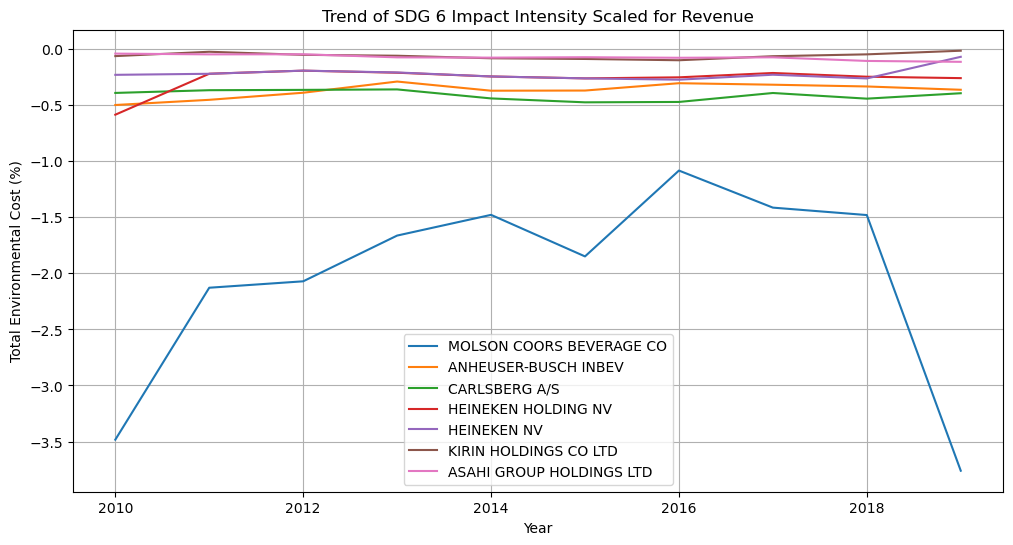

In [22]:
un_sdg = "SDG 6"
# Create a unique list of company names
company_names = df_rev["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))


# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = df_rev[df_rev["Company Name"] == company]
    plt.plot(company_data["Year"], company_data[un_sdg], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (%)")
plt.title(f"Trend of {un_sdg} Impact Intensity Scaled for Revenue")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()